In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr

from shapely.geometry import Point, MultiPoint

from agrifoodpy_data.land.utils import raster_gdf
from agrifoodpy.land.land import LandDataArray

# Countries (December 2024) Boundaries UK BUC

Dataset is available here:
https://geoportal.statistics.gov.uk/datasets/06d13e0421784911aa669768f25dcb18_0

Here we rasterise the boundaries dataset and generate a segment map aligned to
the british national grid

In [2]:
bdry_file = "Countries_December_2024_Boundaries_UK_BUC_-4247675800557514417.gpkg"

# Spatial resolution of the raster map to be generated, in meters
res = 1000

In [3]:
bdry = gpd.read_file(bdry_file)
bdry.head()

,CTRY24CD,CTRY24NM,CTRY24NMW,BNG_E,BNG_N,LONG,LAT,GlobalID,geometry
0,E92000001,England,Lloegr,394883,370883,-2.07812,53.234970,{BD411920-E7EA-4F71-B6C8-5F1D24EC92D3},"MULTIPOLYGON (((400858.93 652768.086, 400000 6..."
1,N92000002,Northern Ireland,Gogledd Iwerddon,86544,535337,-6.85571,54.615021,{652C0C4B-647B-4565-B9ED-E9C17EC5834C},"MULTIPOLYGON (((116847.51 602929.172, 115611.5..."
2,S92000003,Scotland,Yr Alban,277744,700060,-3.97094,56.177441,{97BB1057-3E8D-4AD8-83EF-4577D1BB4D9C},"MULTIPOLYGON (((322064.793 973987.229, 321442...."
3,W92000004,Wales,Cymru,263405,242881,-3.99418,52.067421,{F7C86B8C-B705-44B7-BB7B-46323F7BDDFE},"MULTIPOLYGON (((313635.742 382469.629, 312716...."


In [4]:
ds = raster_gdf(
    bdry,
    "CTRY24NM",
    "CTRY24NM",
    1000,
    anchor=(0,0)
)

ds

<xarray.Dataset>
Dimensions:   (y: 1214, x: 656, ID: 4)
Coordinates:
  * x         (x) float64 500.0 1.5e+03 2.5e+03 ... 6.545e+05 6.555e+05
  * y         (y) float64 500.0 1.5e+03 2.5e+03 ... 1.212e+06 1.214e+06
  * ID        (ID) int64 0 1 2 3
    Region    (ID) <U16 'England' 'Northern Ireland' 'Scotland' 'Wales'
Data variables:
    CTRY24NM  (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan

<Axes: >

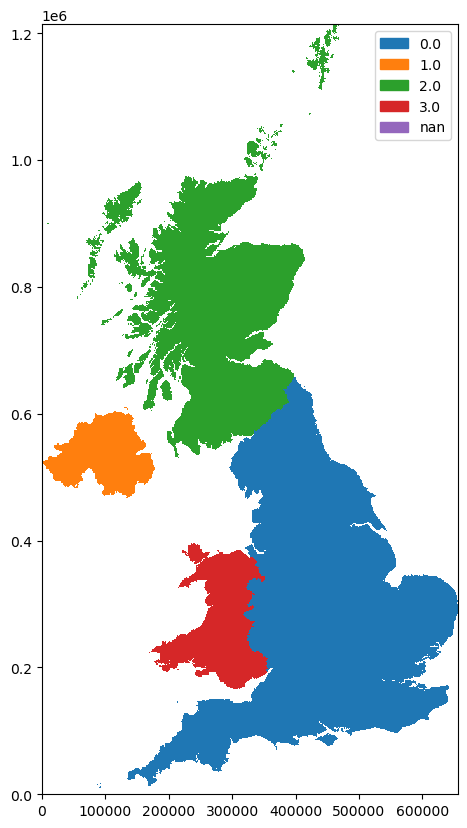

In [5]:
f, ax = plt.subplots(figsize=(10, 10))
ds["CTRY24NM"].land.plot(ax=ax, labels=None)

In [6]:
ds.to_netcdf("../data/ONS_CTRY_DEC_2024_UK_BUC_1000.nc")